In [1]:
import cupy as cp 
import numpy as np
import pygraphblas as gb

# Check if connected to GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU: need to configure runtime type to an environment with an accessible GPU')
else:
    print('Connected to a GPU - GPU info summary: \n\n' + gpu_info)

Connected to a GPU - GPU info summary: 

Fri Oct 11 00:38:48 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.52.01              Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti     On  |   00000000:01:00.0  On |                  N/A |
| 32%   25C    P8              3W /  160W |     640MiB /   8188MiB |      6%      Default |
|                                         |                        |                  N/A |
+------

In [2]:
# Trying out a non-matrix graph library called cuGraph which also uses GPU
# import cugraph
# import cudf

# # Sample edge list
# src = cudf.Series([0, 1, 2, 3, 4])
# dst = cudf.Series([1, 2, 3, 4, 0])

# # Create a Graph
# G = cugraph.Graph(directed=True)
# G.from_cudf_edgelist(cudf.DataFrame({'src': src, 'dst': dst}), source='src', destination='dst')

# # Get the list of edges
# edges_df = G.view_edge_list().sort_values(by=['src', 'dst'])

# # Get the list of nodes (unique vertices)
# nodes_df = cudf.concat([edges_df['src'], edges_df['dst']]).unique()

# # Initialize an empty incidence matrix with zeros
# num_nodes = len(nodes_df)
# adj_matrix = cp.zeros((num_nodes, num_nodes), dtype=np.int32)

# # Iterate through edges and update the incidence matrix
# for _, edge in enumerate(edges_df.to_pandas().iterrows()):
#     i, j = edge[1]['src'], edge[1]['dst']

#     # Set the incidence for the source and destination nodes
#     adj_matrix[i, j] = 1

# # Convert to a cuDF DataFrame for easier viewing
# adj_matrix_df = cudf.DataFrame(adj_matrix)
# print(adj_matrix_df)

In [1]:
# Use python wrapper of GraphBLAS on GPU (BLAS - Basic Linear Algebra Subprograms)
# GraphBLAS supports graph operations via linear algebraic methods (e.g. matrix multiplication) over various semirings

# GraphBLAS version of BMLP-RMS algorithm which performs repeated matrix squaring
from bmlp.matrix import BMLP_RMS, BMLP_SMP

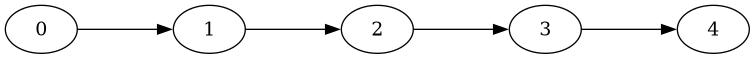

In [4]:
# Simple graph example 1
# Create edge list (directed graph) and the number of nodes (matrix dimension)
edges = [(0, 1), (1, 2), (2, 3), (3, 4)]
num_nodes = 5

import pygraphviz as gviz
G_visual = gviz.AGraph(directed=True)
G_visual.add_edges_from(edges)
G_visual.draw("simple_ex1.png",prog="circo")

from IPython.display import Image

# Provide the path to your local image
Image("simple_ex1.png")

In [5]:
# Create a square adjacency matrix using BOOL type
R1 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)

# Insert edges into the adjacency matrix
for src, dst in edges:
    R1[src, dst] = True
print('R1 = \n'+ str(R1) + '\n')
        
# Print the transitive closure matrix
print('closure R2* = \n' + str(BMLP_RMS(R1, print_matrix=True)) + '\n')

R1 = 
      0  1  2  3  4
  0|     t         |  0
  1|        t      |  1
  2|           t   |  2
  3|              t|  3
  4|               |  4
      0  1  2  3  4

R = R1 + I = 
      0  1  2  3  4
  0|  t  t         |  0
  1|     t  t      |  1
  2|        t  t   |  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

R2* = 
      0  1  2  3  4
  0|  t  t  t      |  0
  1|     t  t  t   |  1
  2|        t  t  t|  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

R2* = 
      0  1  2  3  4
  0|  t  t  t  t  t|  0
  1|     t  t  t  t|  1
  2|        t  t  t|  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

R2* = 
      0  1  2  3  4
  0|  t  t  t  t  t|  0
  1|     t  t  t  t|  1
  2|        t  t  t|  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

closure R2* = 
      0  1  2  3  4
  0|     t  t  t  t|  0
  1|        t  t  t|  1
  2|           t  t|  2
  3|              t|  3
  4|               |  4

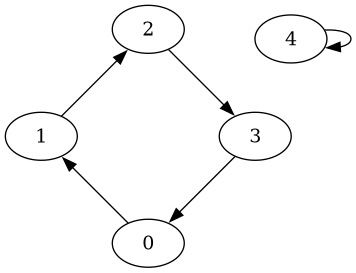

In [6]:
# Simple graph example 2
# Create edge list (directed graph) and the number of nodes (matrix dimension)
edges = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 4)]
num_nodes = 5

G_visual = gviz.AGraph(directed=True)
G_visual.add_edges_from(edges)
G_visual.draw("simple_ex2.png",prog="circo")

# Provide the path to your local image
Image("simple_ex2.png")

In [7]:
# Create a square adjacency matrix using BOOL type
R1 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)

# Insert edges into the adjacency matrix
for src, dst in edges:
    R1[src, dst] = True
print('R1 = \n'+ str(R1) + '\n')
        
# Print the transitive closure matrix
print('closure R2* = \n' + str(BMLP_RMS(R1)) + '\n')

R1 = 
      0  1  2  3  4
  0|     t         |  0
  1|        t      |  1
  2|           t   |  2
  3|  t            |  3
  4|              t|  4
      0  1  2  3  4

closure R2* = 
      0  1  2  3  4
  0|  t  t  t  t   |  0
  1|  t  t  t  t   |  1
  2|  t  t  t  t   |  2
  3|  t  t  t  t   |  3
  4|              t|  4
      0  1  2  3  4



In [8]:
# Create a vector to represent a query
V = gb.Vector.sparse(gb.BOOL, num_nodes)

# query the reachability of node 3
V[3] = True

print('closure V* = \n' + str(BMLP_SMP(V,R1)) + '\n')

closure V* = 
0| t
1| t
2| t
3| t
4|



In [9]:
# Complex graph
num_nodes = 5000
all_edges = [(i, j) for i in range(num_nodes) for j in range(num_nodes)]
print('No. edges: ' + str(len(all_edges)))

No. edges: 25000000


In [10]:
import random, time

num_reps = 10
p = 0.01
total_time = 0

# repeat num_reps times
for i in range(num_reps):

    # sample edges with edge probability < p
    sampled_edges = list(filter(lambda _: random.random() < p, all_edges))

    # Create a square adjacency matrix using BOOL type
    empty_matrix = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
    R1 = empty_matrix

    # Insert edges into the adjacency matrix
    for src, dst in sampled_edges:
        R1[src, dst] = True

    start_time = time.time()
    BMLP_RMS(R1)
    end_time = time.time()

    total_time += end_time - start_time
    print('Wall time: ' + str(end_time - start_time))

print('Mean wall time: ' + str(total_time / num_reps))


Wall time: 0.14957141876220703
Wall time: 0.1416318416595459
Wall time: 0.12098884582519531
Wall time: 1.4885783195495605
Wall time: 1.4405155181884766
Wall time: 0.11778473854064941
Wall time: 0.1220855712890625
Wall time: 0.1107790470123291
Wall time: 1.4530925750732422
Wall time: 0.1209723949432373
Mean wall time: 0.5266000270843506
